In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

url = "creditcard.csv"

creditcard = pd.read_csv(url)

creditcard

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19893,30631,-0.377215,0.973528,1.647077,0.732439,0.024728,-0.541379,0.828488,-0.060740,-0.725148,-0.450153,0.242824,0.488841,0.559073,0.137418,0.863233,-0.415339,-0.029005,-0.602882,-0.904378,-0.035009,0.228443,0.685913,-0.107687,0.631740,0.126366,-0.327633,0.056522,0.033139,29.90,0.0
19894,30631,1.209281,0.078793,0.061820,0.593730,-0.235772,-0.448524,-0.141196,0.089236,0.411825,-0.263041,-0.572076,-1.062719,-2.106307,0.195707,1.634883,0.404446,0.278583,-0.336045,-0.409635,-0.224263,-0.302369,-0.984051,0.130401,-0.390756,0.105615,0.152881,-0.025292,0.021130,16.00,0.0
19895,30632,1.286596,-1.450336,0.814530,-1.308949,-2.055209,-0.592064,-1.317286,0.032386,-1.720017,1.589335,1.187759,-0.705883,-0.567504,-0.062561,0.250012,0.047145,0.259016,0.881106,-0.247161,-0.219582,0.040743,0.262534,-0.045112,0.515660,0.218606,-0.138794,0.026395,0.030885,92.00,0.0
19896,30633,-0.488090,1.018448,0.670593,-0.245462,0.828347,-0.233102,0.662586,-0.040028,-0.279439,-0.402822,-1.387400,-0.332092,0.764095,-0.630524,0.970633,0.765937,-0.533608,0.267265,0.450661,0.145257,-0.344859,-0.902035,-0.050171,-1.060827,0.062221,0.150428,0.130266,0.067290,1.99,0.0


In [2]:
print(creditcard.shape)

(19898, 31)


In [4]:
print(creditcard.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [5]:
creditcard["Class"].value_counts()

0.0    19812
1.0       85
Name: Class, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


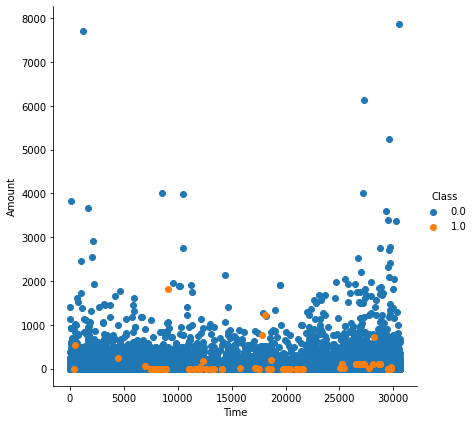

In [6]:
sns.FacetGrid(creditcard, hue="Class", size = 6).map(plt.scatter, "Time", "Amount").add_legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


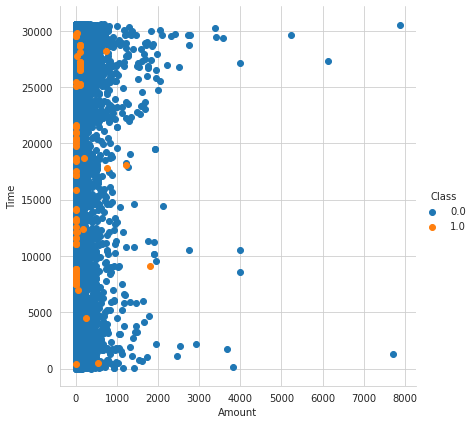

In [8]:
sns.set_style("whitegrid")
sns.FacetGrid(creditcard, hue="Class", size = 6).map(plt.scatter, "Amount", "Time").add_legend()
plt.show()

In [9]:
FilteredData = creditcard[['Time','Amount', 'Class']]

In [10]:
FilteredData

,Time,Amount,Class
0,0,149.62,0.0
1,0,2.69,0.0
2,1,378.66,0.0
3,1,123.50,0.0
4,2,69.99,0.0
...,...,...,...
19893,30631,29.90,0.0
19894,30631,16.00,0.0
19895,30632,92.00,0.0
19896,30633,1.99,0.0


In [11]:

print(FilteredData.shape)

(19898, 3)


In [12]:
FilteredData["Class"].value_counts()

0.0    19812
1.0       85
Name: Class, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


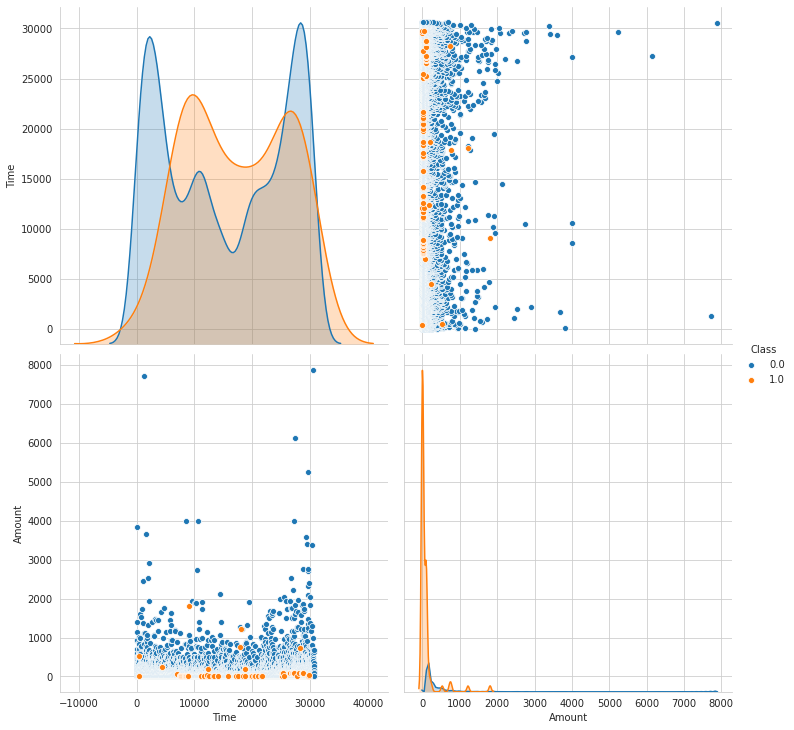

In [13]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(FilteredData, hue="Class", size=5);
plt.show()

In [16]:
countLess = 0
countMore= 0
for i in range(19898):
    if(FilteredData.iloc[i]["Amount"] < 2000):
        countLess = countLess + 1
    else:
        countMore = countMore + 1
print(countLess)
print(countMore)

19870
28


In [18]:
percentage = (countLess/19898)*100
percentage

99.85928233993366

In [19]:
class0 = 0
class1 = 0
for i in range(19898):
    if(FilteredData.iloc[i]["Amount"] < 2000):
        if(FilteredData.iloc[i]["Class"] == 0):
            class0 = class0 + 1
        else:
            class1 = class1 + 1
        
print(class0)
print(class1)

19785
85


In [20]:
FilteredData["Class"].value_counts()

0.0    19812
1.0       85
Name: Class, dtype: int64

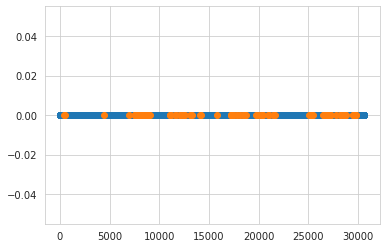

In [21]:
creditCard_genuine = FilteredData.loc[FilteredData["Class"] == 0]
creditCard_fraud = FilteredData.loc[FilteredData["Class"] == 1]

plt.plot(creditCard_genuine["Time"], np.zeros_like(creditCard_genuine["Time"]), "o")
plt.plot(creditCard_fraud["Time"], np.zeros_like(creditCard_fraud["Time"]), "o")

plt.show()

#X-axis: Time

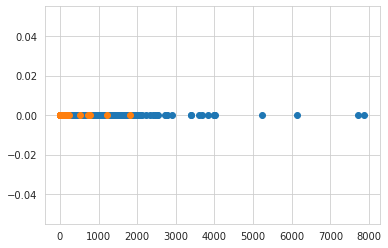

In [22]:
plt.plot(creditCard_genuine["Amount"], np.zeros_like(creditCard_genuine["Amount"]), "o")
plt.plot(creditCard_fraud["Amount"], np.zeros_like(creditCard_fraud["Amount"]), "o")

plt.show()
#X-axis: Amount

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


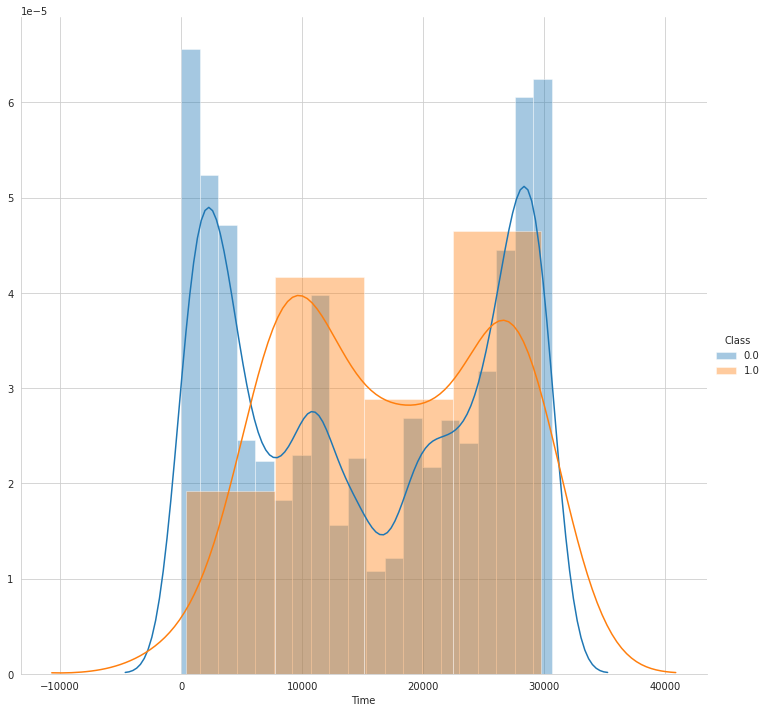

In [23]:
sns.FacetGrid(FilteredData, hue="Class", size=10).map(sns.distplot, "Time").add_legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


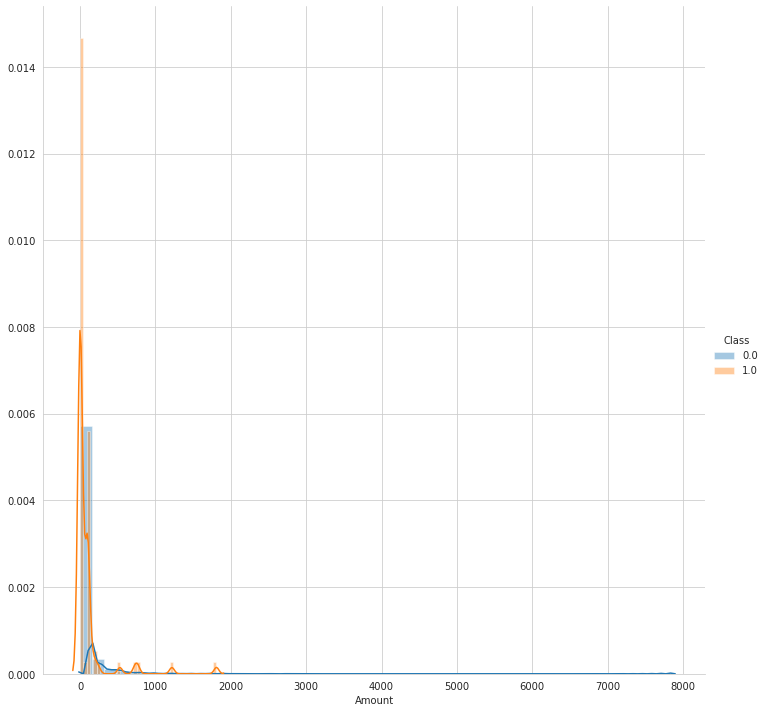

In [24]:
sns.FacetGrid(FilteredData, hue="Class", size=10).map(sns.distplot, "Amount").add_legend()
plt.show()

In [27]:
print("Means:")
print("Mean of transaction amount of genuine transactions: ",np.mean(creditCard_genuine["Amount"]))
print("Mean of transaction amount of fraud transactions: ",np.mean(creditCard_fraud["Amount"]))

Means:
Mean of transaction amount of genuine transactions:  70.16985463355212
Mean of transaction amount of fraud transactions:  93.86964705882347


In [28]:
print("Standard Deviation:")
print("Std-Deviation of transaction amount of genuine transactions: ", np.std(creditCard_genuine["Amount"]))
print("Std-Deviation of transaction amount of fraud transactions: ", np.std(creditCard_fraud["Amount"]))

Standard Deviation:
Std-Deviation of transaction amount of genuine transactions:  205.0859415278996
Std-Deviation of transaction amount of fraud transactions:  260.19245900564596


In [29]:
print("Median:")
print("Median of transaction amount of genuine transactions: ", np.median(creditCard_genuine["Amount"]))
print("Median of transaction amount of fraud transactions: ", np.median(creditCard_fraud["Amount"]))

Median:
Median of transaction amount of genuine transactions:  16.07
Median of transaction amount of fraud transactions:  1.0


In [30]:
print("\nQuantiles:")
print(np.percentile(creditCard_genuine["Amount"],np.arange(0, 100, 25)))
print(np.percentile(creditCard_fraud["Amount"],np.arange(0, 100, 25)))


Quantiles:
[ 0.    5.9  16.07 59.95]
[ 0.    1.    1.   99.99]


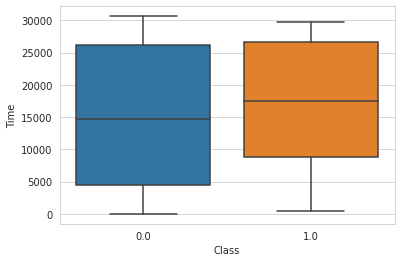

In [31]:
sns.boxplot(x = "Class", y = "Time", data = creditcard)
plt.show()

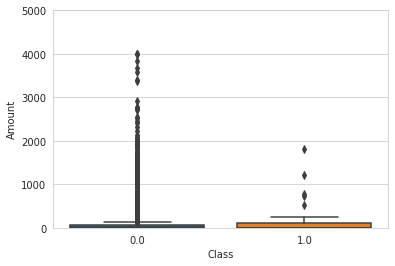

In [32]:
sns.boxplot(x = "Class", y = "Amount", data = creditcard)
plt.ylim(0, 5000)
plt.show()

In [33]:
from scipy import spatial

In [34]:
sampleData = creditcard.head(4000)   #Sample the data from original data so as to save the computation time.

In [39]:

samples = creditcard.loc[15401:15420]    #Taking sample of size 100 from index 15401 to 15500.

In [40]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [41]:
frame = []

In [42]:
for i in range(15401, 15420):
    t1 = samples.loc[i]
    c = samples.loc[i]["Class"]
    for j in range(4000):
        t2 = sampleData.loc[j]
        classLabel = creditcard.loc[j]["Class"]
        similarity = 1 - spatial.distance.cosine(t1, t2)
        frame.append([classLabel, similarity, j])
        
    df = pd.DataFrame(frame, columns=['Class', 'Similarity', 'Transaction ID'])
    df_sorted = df.sort_values("Similarity", ascending=False)
    print("Top 10 transactions having highest similarity with transaction ID = "+str(i)+" and class = "+str(c)+":")
    print(df_sorted.iloc[:10])
    print("\n")
    frame = []

Top 10 transactions having highest similarity with transaction ID = 15401 and class = 0.0:
      Class  Similarity  Transaction ID
3896    0.0         1.0            3896
3883    0.0         1.0            3883
3865    0.0         1.0            3865
3927    0.0         1.0            3927
3957    0.0         1.0            3957
3884    0.0         1.0            3884
3961    0.0         1.0            3961
3713    0.0         1.0            3713
3413    0.0         1.0            3413
3633    0.0         1.0            3633


Top 10 transactions having highest similarity with transaction ID = 15402 and class = 0.0:
      Class  Similarity  Transaction ID
3927    0.0         1.0            3927
3865    0.0         1.0            3865
3896    0.0         1.0            3896
3883    0.0         1.0            3883
3961    0.0         1.0            3961
3884    0.0         1.0            3884
3957    0.0         1.0            3957
3709    0.0         1.0            3709
3413    0.0     